In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
df = pd.read_csv('car_data.csv')
df.head(-1)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
994,951,Female,53,104000,1
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [5]:
df.drop('User ID', axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [6]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


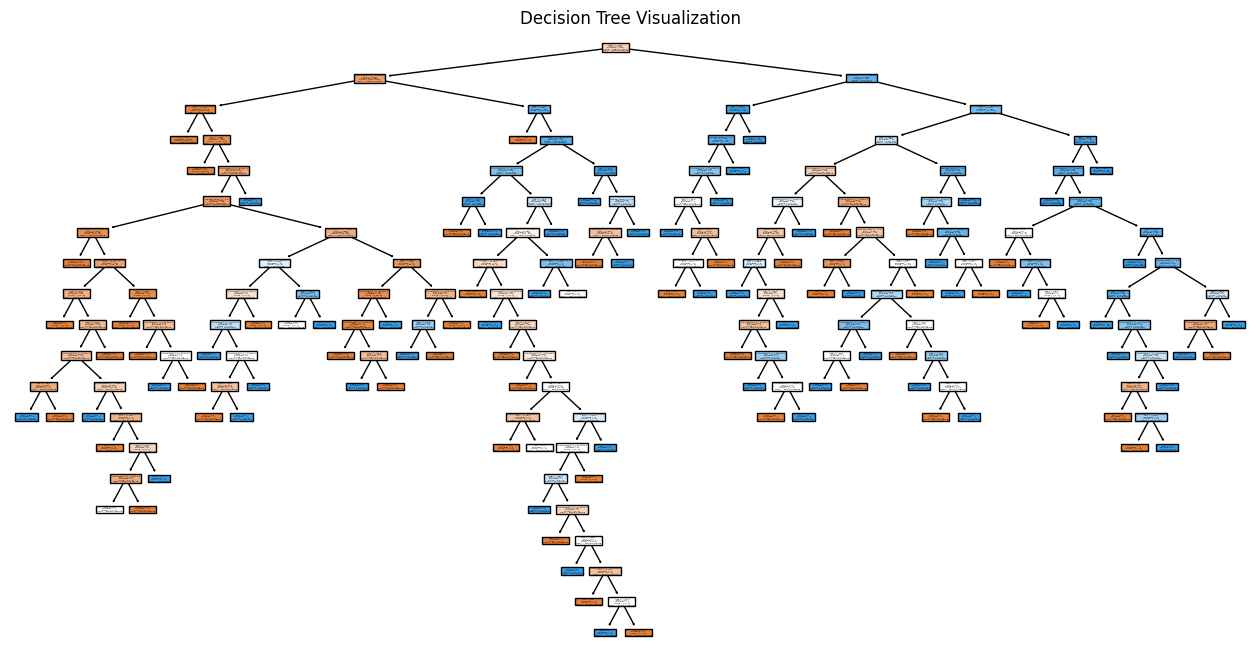

In [9]:
plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=['Not Purchased', 'Purchased'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [10]:
y_pred = model.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       112
           1       0.90      0.86      0.88        88

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



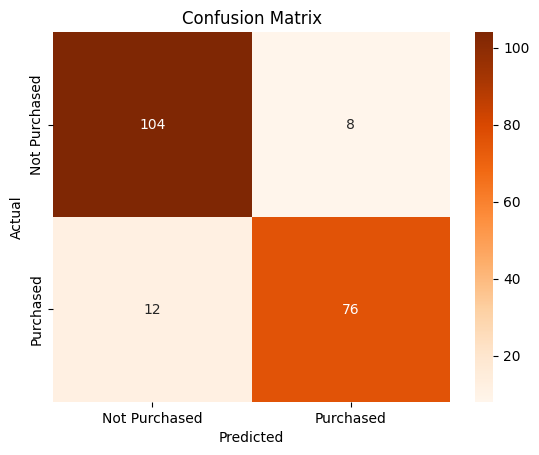

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Feature Importances:
         Feature  Importance
0           Age    0.520760
1  AnnualSalary    0.461818
2   Gender_Male    0.017422


C:\Users\subra\AppData\Local\Temp\ipykernel_21844\4151146775.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


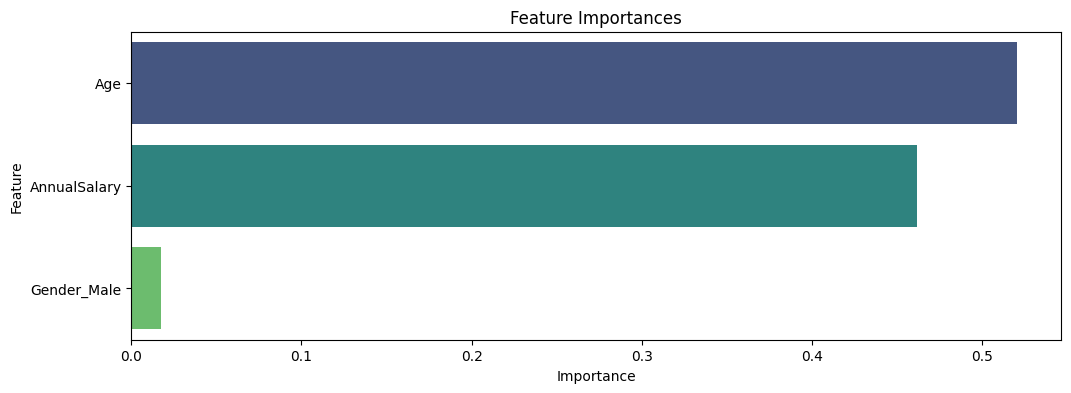

In [26]:
#Analysis of Feature Importance
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)
# Plotting Feature Importances
plt.figure(figsize=(12, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

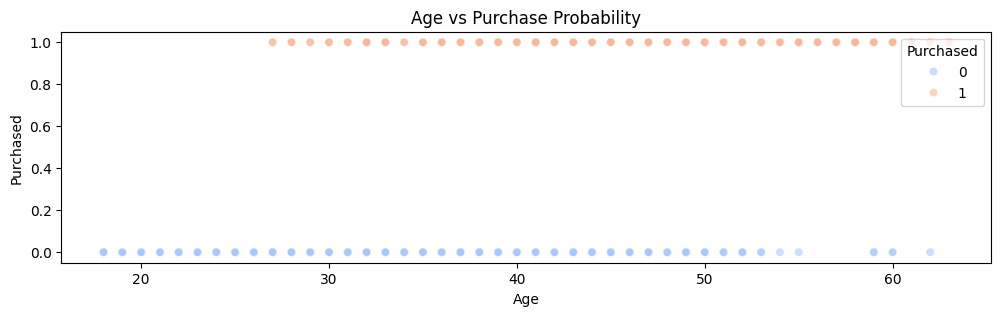

In [24]:
#Age vs Purchase Probability
plt.figure(figsize=(12, 3))
sns.scatterplot(x=df['Age'], y=df['Purchased'], hue=df['Purchased'], palette='coolwarm', alpha=0.6)
plt.title("Age vs Purchase Probability")
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.legend(title='Purchased', loc='upper right')
plt.show()

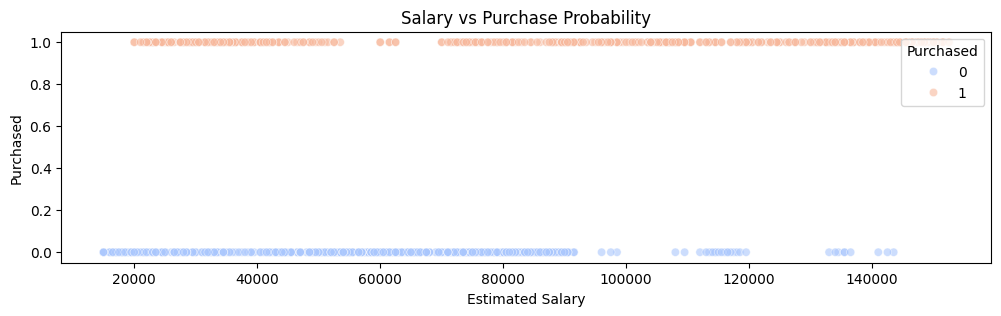

In [25]:
#Salary vs Purchase Probability
plt.figure(figsize=(12, 3))  
sns.scatterplot(x=df['AnnualSalary'], y=df['Purchased'], hue=df['Purchased'], palette='coolwarm', alpha=0.6)
plt.title("Salary vs Purchase Probability")
plt.xlabel("Estimated Salary")
plt.ylabel("Purchased")
plt.legend(title='Purchased', loc='upper right')
plt.show()

In [28]:
#Check perchased for a new user
new_user = pd.DataFrame({
    'Age': [30],
    'AnnualSalary': [50000],
})
new_user = pd.get_dummies(new_user, columns=['Age', 'AnnualSalary'], drop_first=True)
new_user = new_user.reindex(columns=X.columns, fill_value=0)
new_prediction = model.predict(new_user)
print("New User Prediction (0: Not Purchased, 1: Purchased):", new_prediction[0])
if new_prediction[0] == 1:
    print("The new user is likely to purchase car.")
else:
    print("The new user is unlikely to purchase car.")

New User Prediction (0: Not Purchased, 1: Purchased): 0
The new user is unlikely to purchase car.
